# **Customer Churn**

*Customer churn, also known as customer attrition, refers to the loss of customers or clients over a given period. In the context of a business, it is the percentage of subscribers to a service who discontinue their subscriptions within a given time period. Understanding and analyzing customer churn is crucial for businesses because retaining existing customers is generally more cost-effective than acquiring new ones.*

*The churn rate is the percentage of customers who leave a service over a specific period.*

*By systematically analyzing customer churn, businesses can develop effective strategies to retain customers, improve customer satisfaction, and ultimately enhance profitability.*

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

### **LOAD DATA**

In [201]:
import pandas as pd # type: ignore
df = pd.read_csv(r"C:\Users\konal\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### **STUDY DATA**

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset consists of 7043 entries and 21 columns.

The **TotalCharges** column is currently of type object, but it should be a numerical type (float64).

Convert the **TotalCharges** column to a numerical type and handle any potential issues during the conversion.

In [3]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' will introduce NaNs for conversion errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for null values
null_values = df.isnull().sum()
null_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
df['TotalCharges'].dtype

dtype('float64')

* The **TotalCharges** column had 11 missing values after conversion to numeric.
* All other columns have complete data.

### **HANDLE NULL VALUES AND OUTLIERS**

**Handle Null Values**

In [5]:
print(df[df['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

* A tenure of 0 means that they are the  customers who just signed up.

* Upon Observing, we can see that the missing 11 values are of customers who has '0' tenure, so they wouldn't have a **"TotalCharges"** value yet as they have no tenure to bill their TotalCharge.

In [6]:
# Fill missing values in 'TotalCharges' with the '0'
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify there are no more null values
null_values_after = df.isnull().sum()
null_values_after


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**OUTLIERS**

In [7]:
# Function to calculate and count outliers
def count_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, len(outliers)

# Identify and count outliers
outliers_monthlycharges, num_outliers_monthlycharges = count_outliers('MonthlyCharges')
outliers_totalcharges, num_outliers_totalcharges = count_outliers('TotalCharges')
outliers_tenure, num_outliers_tenure = count_outliers('tenure')


# Print the number of outliers for each column
print(f"Number of outliers in MonthlyCharges: {num_outliers_monthlycharges}")
print(f"Number of outliers in TotalCharges: {num_outliers_totalcharges}")
print(f"Number of outliers in tenure: {num_outliers_tenure}")

Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Number of outliers in tenure: 0


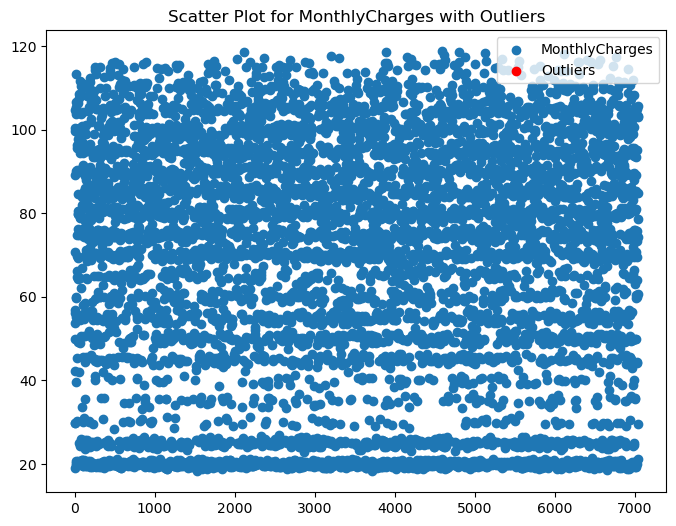

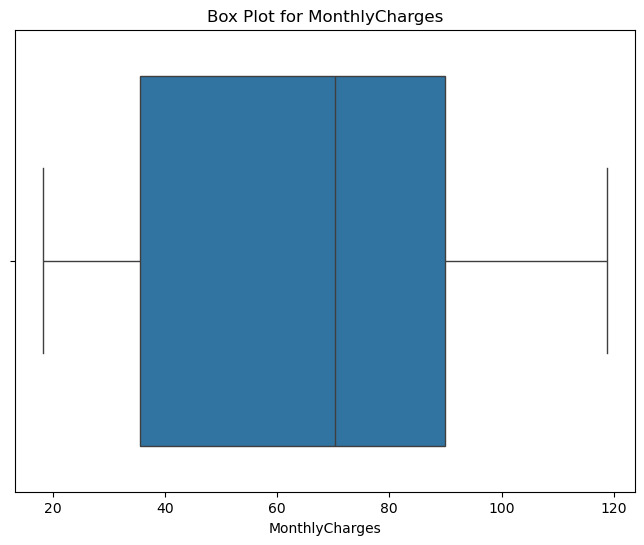

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['MonthlyCharges'], label='MonthlyCharges')
plt.scatter(outliers_monthlycharges.index, outliers_monthlycharges['MonthlyCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for MonthlyCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Box Plot for MonthlyCharges')
plt.show()

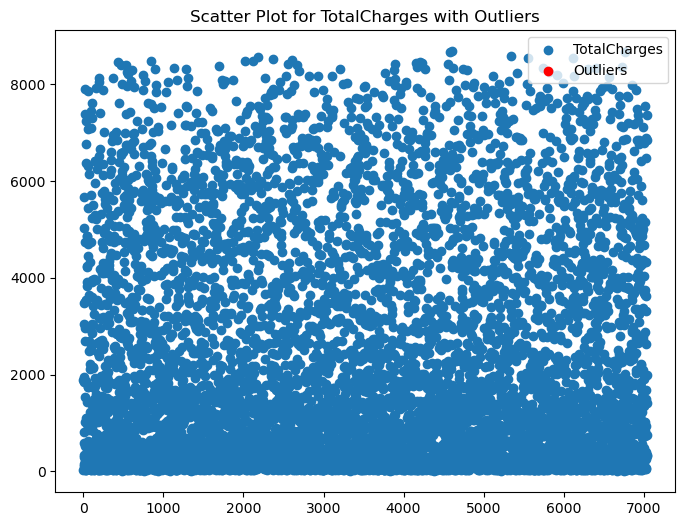

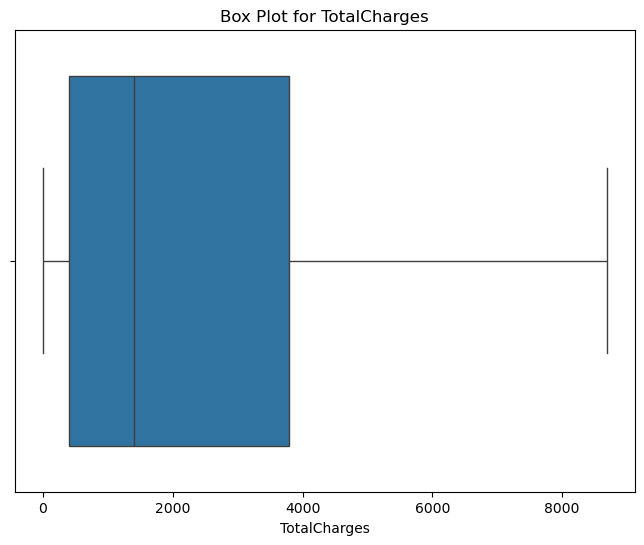

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['TotalCharges'], label='TotalCharges')
plt.scatter(outliers_totalcharges.index, outliers_totalcharges['TotalCharges'], color='red', label='Outliers')
plt.title('Scatter Plot for TotalCharges with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Box Plot for TotalCharges')
plt.show()

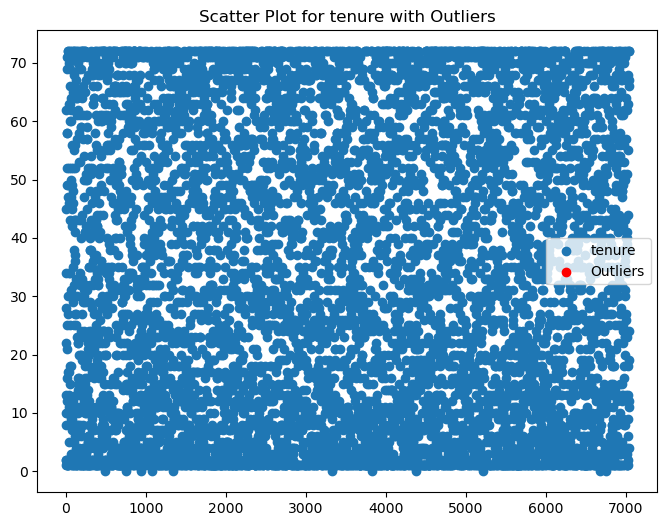

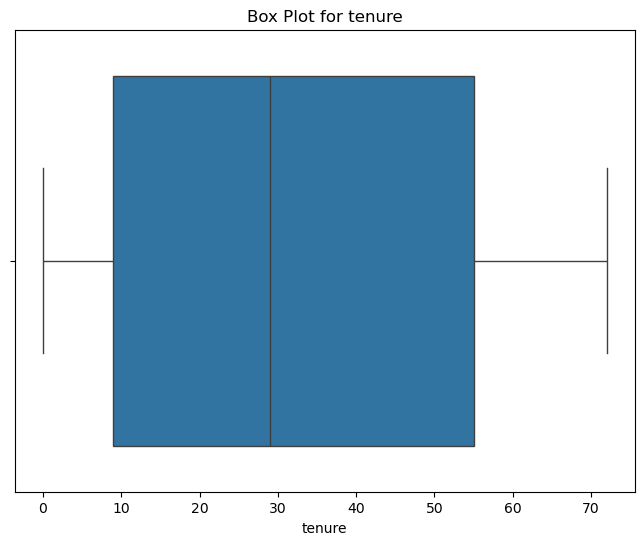

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['tenure'], label='tenure')
plt.scatter(outliers_tenure.index, outliers_tenure['tenure'], color='red', label='Outliers')
plt.title('Scatter Plot for tenure with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot for tenure')
plt.show()

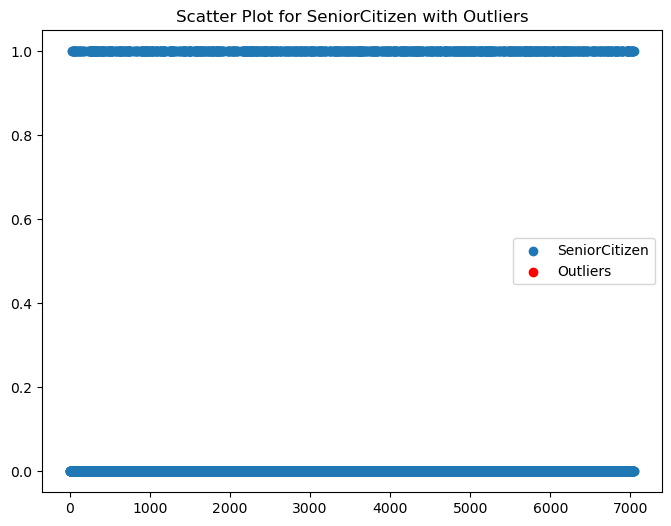

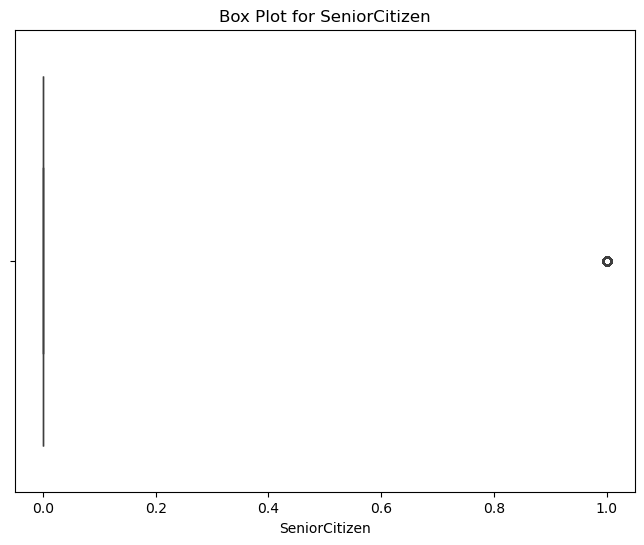

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['SeniorCitizen'], label='SeniorCitizen')
plt.scatter(outliers_tenure.index, outliers_tenure['SeniorCitizen'], color='red', label='Outliers')
plt.title('Scatter Plot for SeniorCitizen with Outliers')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SeniorCitizen'])
plt.title('Box Plot for SeniorCitizen')
plt.show()


# Display the value counts
senior_citizen_counts = df['SeniorCitizen'].value_counts()
print(senior_citizen_counts)

In [12]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# **Exploratory Data Analysis (EDA)**

In [13]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn Rate: {churn_rate}")

Churn Rate: Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


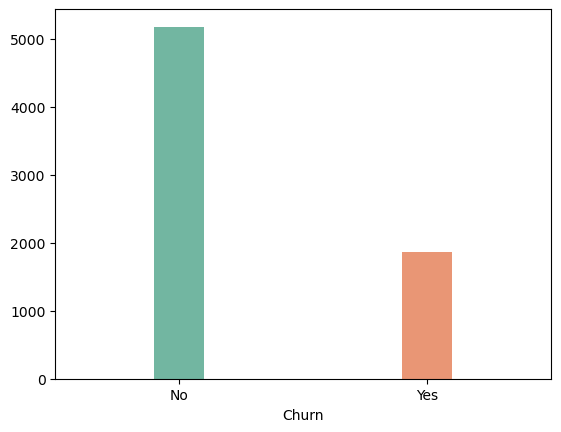

In [208]:
sns.countplot(x='Churn', data=df, hue='Churn',width = 0.2, palette='Set2')
plt.ylabel('')
plt.show()

### **Univariate Analysis**

Univariate analysis examines one variable at a time to summarize and understand its distribution, central tendency, and variability.


**Contract**
* The type of contract customers have (Month-to-month, One year, Two year).

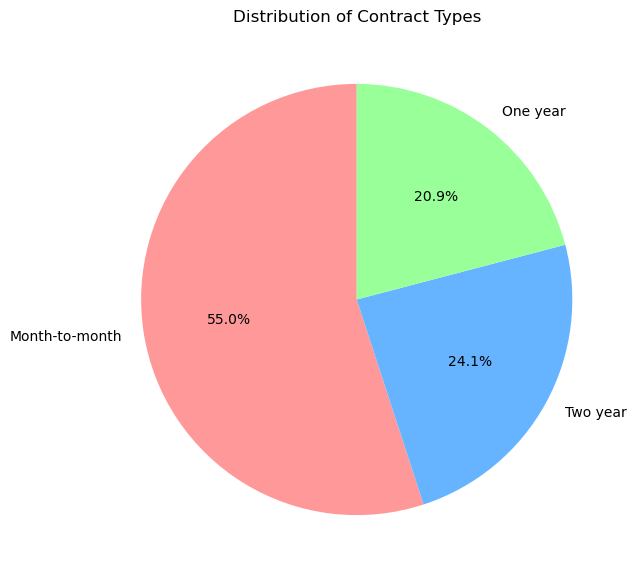

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [56]:
plt.figure(figsize=(10, 7))
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Contract Types')
plt.ylabel('')
plt.show()

df['Contract'].value_counts()


* **Month-to-month** contracts are the most common, followed by one-year and two-year contracts.

* This indicates that a significant portion of the customer base prefers the flexibility of a month-to-month contract.

**Internet Service**

* The type of internet service customers have (DSL, Fiber optic, No).

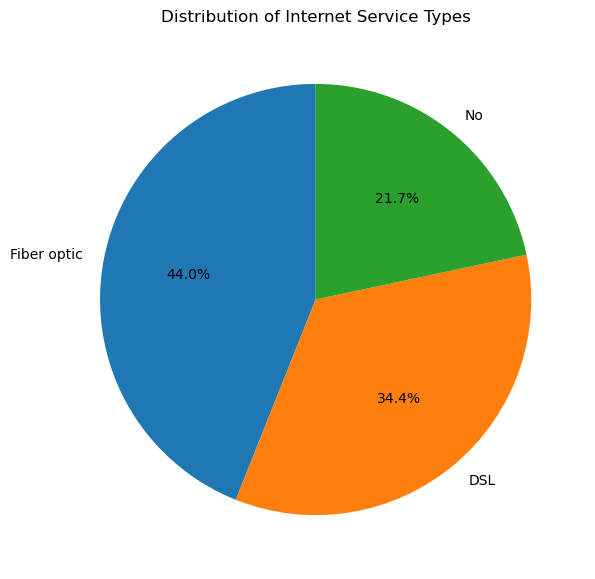

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [57]:
# Internet Service
plt.figure(figsize=(10, 7))
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Internet Service Types')
plt.ylabel('')
plt.show()

df['InternetService'].value_counts()


* **Fiber optic** is the most common internet service, followed by DSL, with a smaller number of customers having no internet service.

* This suggests that customers prefer faster internet options.

**Payment Method**

* The method of payment customers use (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

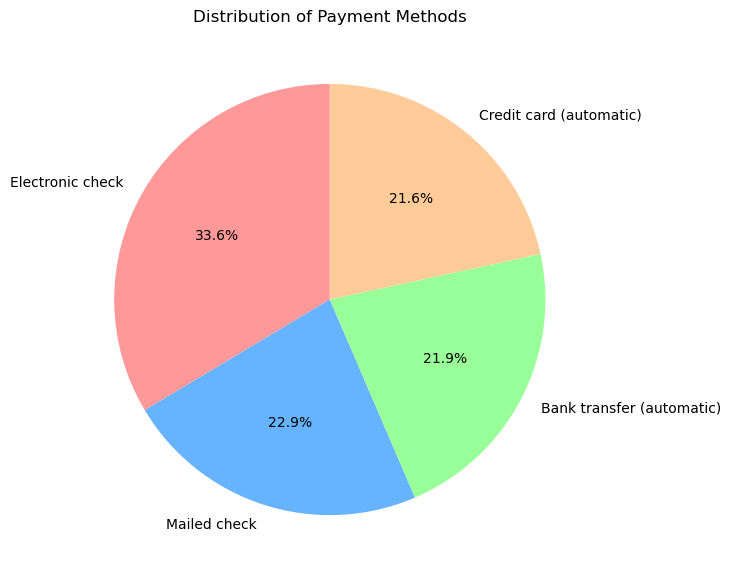

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [58]:
# Payment Method
plt.figure(figsize=(10, 7))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', '#ffcc99'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

df["PaymentMethod"].value_counts()

* **Electronic check** is the most common payment method, followed by mailed check, bank transfer, and credit card payments.

* This indicates a preference for electronic and automated payment methods among customers.

## **BIVARIATE ANALYSIS**

Bivariate analysis is a statistical method that examines the relationship between two variables. It explores if and how two variables are associated or correlated with each other.


### **Gender Vs Churn**

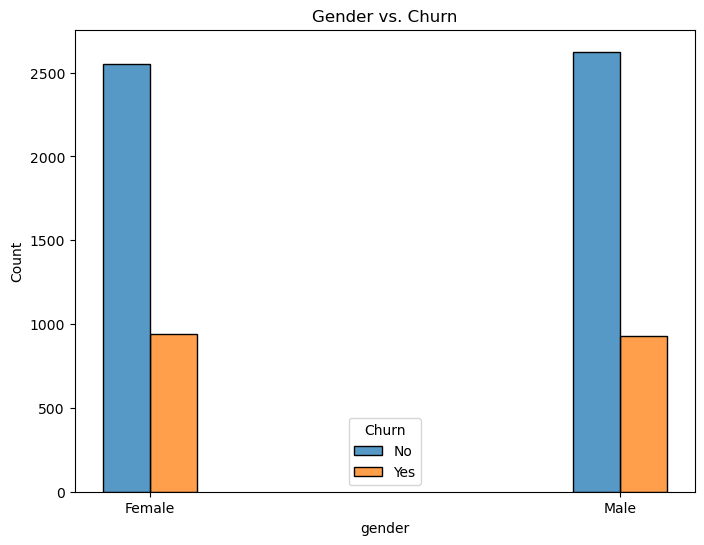

gender
Male      3555
Female    3488
Name: count, dtype: int64 

gender
Female    939
Male      930
Name: count, dtype: int64


In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(x='gender', hue='Churn', data=df, shrink=0.2, multiple='dodge')
plt.title('Gender vs. Churn')
plt.show()

print(df['gender'].value_counts(),'\n')

churned_gender_count = df[df['Churn']=='Yes']['gender'].value_counts()
print(churned_gender_count)

*Observation:* 
* There is no significant difference in churn rates between male and female customers.

* male and female customers are equally likely to stay or move out, indicating that gender doesn't influence the decision to churn.

### **SeniorCitizen vs. Churn**

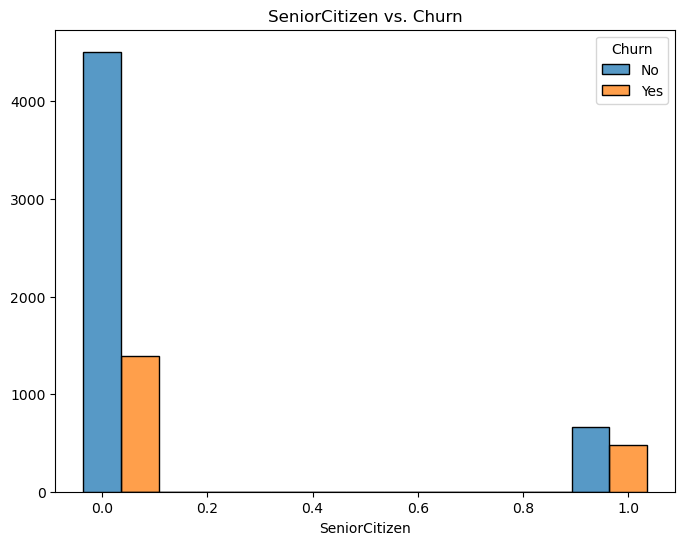

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

SeniorCitizen
0    1393
1     476
Name: count, dtype: int64


In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(x='SeniorCitizen', hue='Churn', data=df, shrink = 2, multiple='dodge')
plt.title('SeniorCitizen vs. Churn')
plt.ylabel('')
plt.show()

print(df['SeniorCitizen'].value_counts(),'\n')

churned_senior_citizen_count = df[df['Churn']=='Yes']["SeniorCitizen"].value_counts()
print(churned_senior_citizen_count)

*Observation :* 
* Senior citizens have a higher churn rate compared to non-senior citizens.

* Older citizens might be looking for more specialized services or amenities that aren't available, leading to a higher likelihood of moving out.

### **Partner vs. Churn**

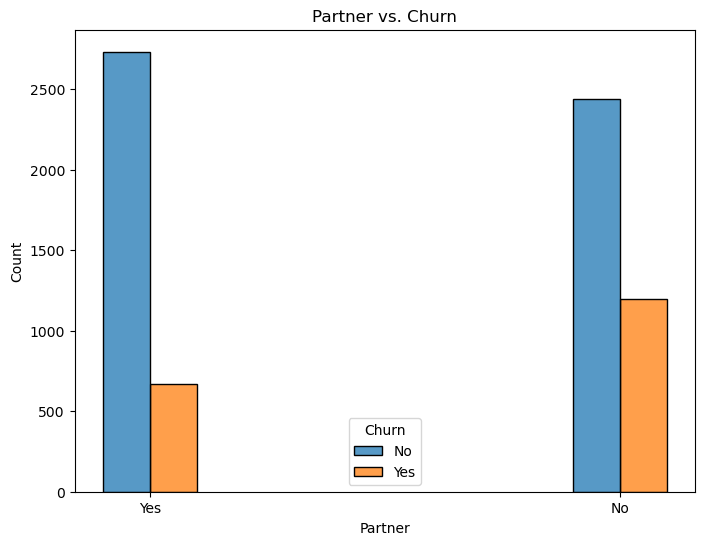

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Partner
No     1200
Yes     669
Name: count, dtype: int64


In [209]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Partner', hue='Churn',data=df, shrink=0.2, multiple='dodge')
plt.title('Partner vs. Churn')
plt.show()

print(df['Partner'].value_counts(),'\n')

churned_partner_count = df[df['Churn']=='Yes']["Partner"].value_counts()
print(churned_partner_count)

*Observation :* 
* Customers without partners are more likely to churn.

* Single customers might feel less attached to the community or lack the support system that partnered ones have, making them more likely to leave.

### **Dependents vs. Churn**

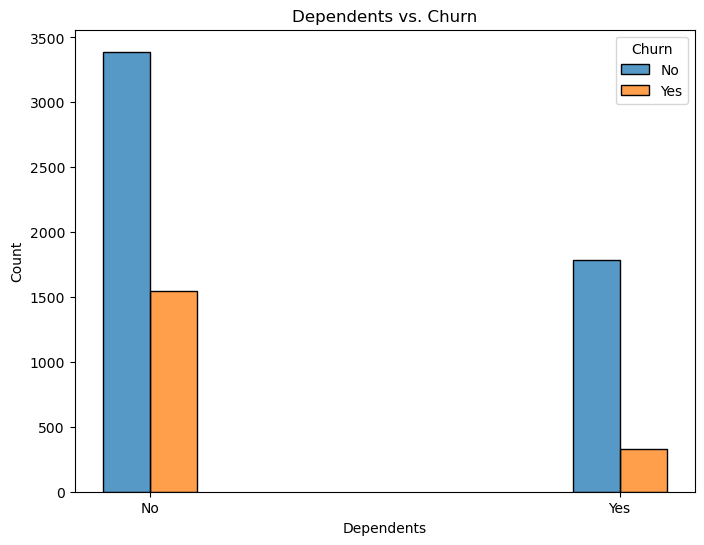

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

Dependents
No     1543
Yes     326
Name: count, dtype: int64


In [210]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Dependents', hue='Churn', data=df, shrink=0.2, multiple='dodge')
plt.title('Dependents vs. Churn')
plt.show()

print(df['Dependents'].value_counts(),'\n')

churned_dependent_count = df[df['Churn']=='Yes']["Dependents"].value_counts()
print(churned_dependent_count)

*Observation :* 
* Customers without dependents have a higher churn rate.

* Customers without families might have fewer reasons to stay in one place, making them more flexible and more likely to move out.

### **InternetService Vs Churn**

**Which InternetService customers are churing more?**

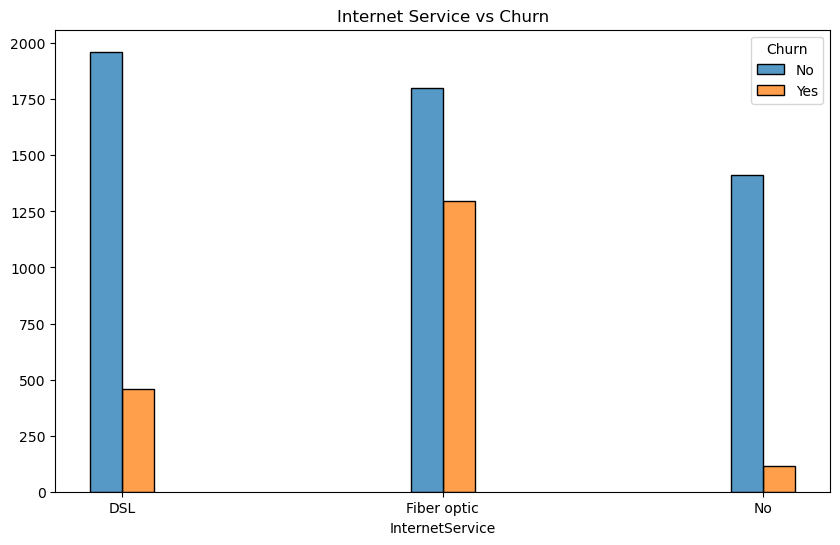

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64


In [75]:
# Hist plot for Internet Service and Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='InternetService', hue='Churn',multiple='dodge',shrink=0.2)
plt.title('Internet Service vs Churn')
plt.ylabel('')
plt.show()

print(df['InternetService'].value_counts(),'\n')

churned_InternetService_count = df[df['Churn']=='Yes']["InternetService"].value_counts()
print(churned_InternetService_count)


* **Fiber optic** customers have a higher number of churns compared to DSL and No internet service customers. This might indicate issues related to service satisfaction or cost.

### **Phone Service Vs Churn**

**Which PhoneService Customers are churning?**

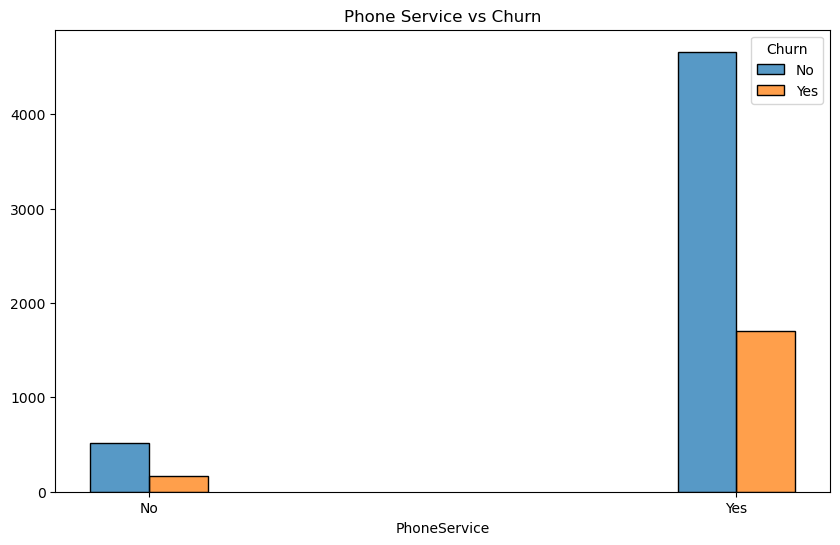

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

PhoneService
Yes    1699
No      170
Name: count, dtype: int64


In [109]:
# Hist plot for Phone Service and Churn

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhoneService', hue='Churn', multiple='dodge', shrink=0.2)
plt.title('Phone Service vs Churn')
plt.ylabel('')
plt.show()

print(df['PhoneService'].value_counts(),'\n')

churned_PhoneService_count = df[df['Churn']=='Yes']["PhoneService"].value_counts()
print(churned_PhoneService_count)


* This Hist plot shows the number of customers with and without phone service and how many of them churned.

* The majority of customers have **phone service**, and there is a similar proportion of churners among those with and without phone service. This indicates that phone service alone may not be a primary factor in customer churn.

### **OnlineBackup Vs Churn**

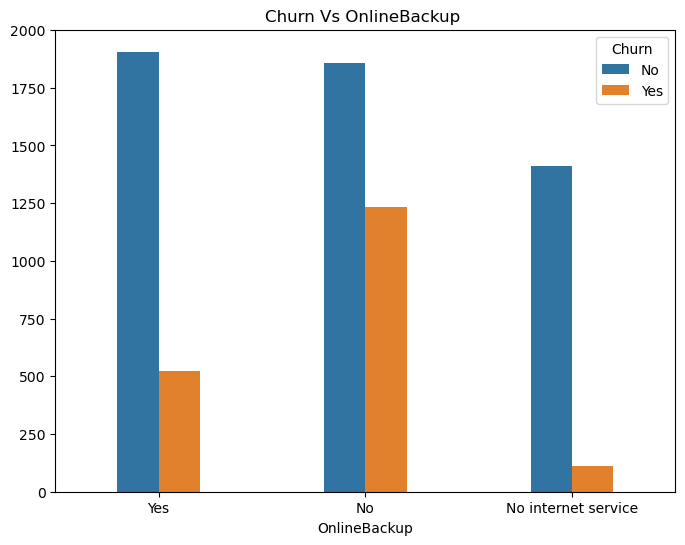

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

OnlineBackup
No                     1233
Yes                     523
No internet service     113
Name: count, dtype: int64


In [132]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineBackup', hue='Churn', data=df, width=0.4)
plt.title('Churn Vs OnlineBackup ')
plt.xlabel('OnlineBackup')
plt.ylabel('')
plt.show()

print(df['OnlineBackup'].value_counts(),'\n')

churned_OnlineBackup_count = df[df['Churn']=='Yes']["OnlineBackup"].value_counts()
print(churned_OnlineBackup_count)

*Observation:*

* ***Higher Churn without OnlineBackup:*** Customers without **OnlineBackup** have a significantly higher churn rate compared to those with OnlineBackup.

* Customers without OnlineBackup may feel their data is at risk or that the service lacks necessary protection, leading to dissatisfaction and higher churn rates.

* On the other hand, lower churn rates among customers with OnlineBackup might indicate that this service provides value, potentially enhancing customer retention.

* This suggests that lack of data protection services (OnlineBackup) might be a critical factor driving churn, possibly due to perceived risk or actual data loss incidents.

### **OnlineService Vs Churn**

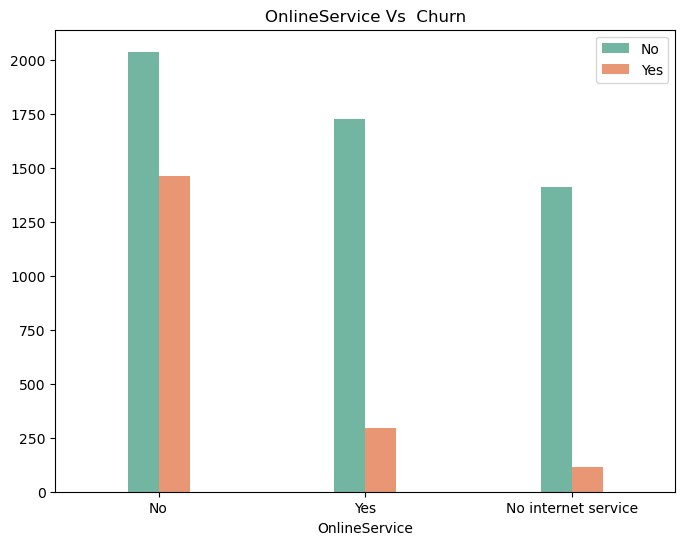

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64


In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='Set2',width=0.3)
plt.title('OnlineService Vs  Churn')
plt.xlabel('OnlineService')
plt.ylabel('')
plt.legend()
plt.show()

print(df['OnlineSecurity'].value_counts(),'\n')

churned_OnlineSecurity_count = df[df['Churn']=='Yes']["OnlineSecurity"].value_counts()
print(churned_OnlineSecurity_count)

*Observation:*
* ***Higher Churn without OnlineService  :*** Higher churn rates among customers without online services.

* Customers without OnlineService might be less satisfied due to missing out on convenient features or additional support provided through online services.

* ***Lower Churn with OnlineService  :*** Lower churn rates among customers with online backup services.

## **MULTIVARIATE ANALYSIS**

* Multivariate analysis is a statistical method that examines the relationships between three or more variables simultaneously. It explores how these variables are associated or correlated with each other, and how they collectively influence a particular outcome or phenomenon.

### **InternetService and MonthlyCharges Vs Churn**

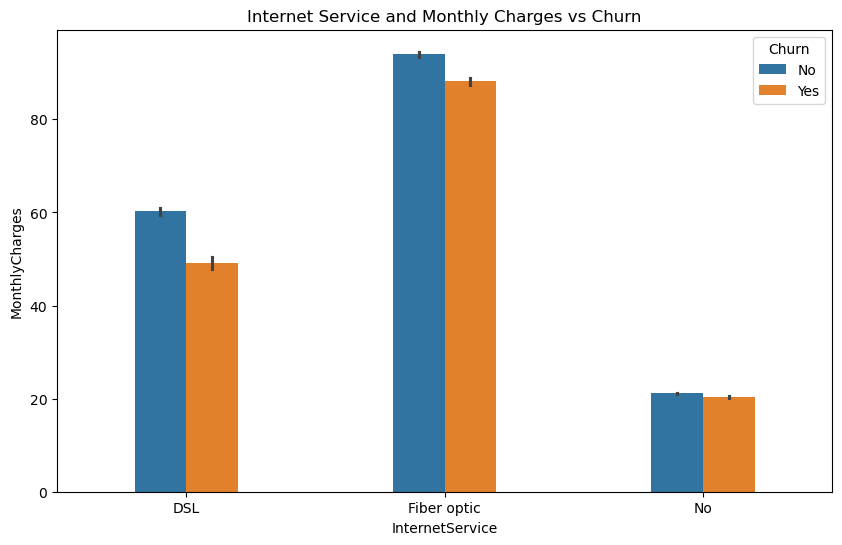

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn',width=0.4)
plt.title('Internet Service and Monthly Charges vs Churn')
plt.show()


* This bar plot shows the distribution of monthly charges for each type of Internet service (DSL, Fiber optic, and No internet service), split by churn status.


#### **Observations**

**Fiber Optic Service:**

* Customers with Fiber optic InternetService have higher MonthlyCharges on average.

* Among these, churn rates are higher compared to other types of Internet services, indicating that higher charges might be a factor for churn.

**DSL Service:**

* Customers with DSL InternetService have lower MonthlyCharges compared to Fiber optic.

* Churn rates among DSL customers are lower, suggesting that these customers might be more satisfied with their value for money.

**No Internet Service:**

* Customers without InternetService have the lowest MonthlyCharges, mostly related to non-internet-related services.

* Churn rates are also lower in this group, indicating that non-internet-related customers might have different satisfaction criteria.

#### **Conclusion**

**Impact of Monthly Charges:**

* Higher monthly charges are associated with higher churn rates, especially for customers with Fiber optic internet services. 

* This could indicate that these customers feel they are not receiving sufficient value for the higher costs they are incurring.

**Internet Service Type:**

***Fiber optic customers,*** despite having the latest technology, tend to churn more, possibly due to higher costs or unmet expectations.

***DSL customers,*** with more moderate charges, show lower churn rates, indicating a balance of cost and satisfaction.

Customers without internet services churn the least, likely due to different service expectations and cost structures.

### **PhoneService and MonthlyCharges Vs Churn**

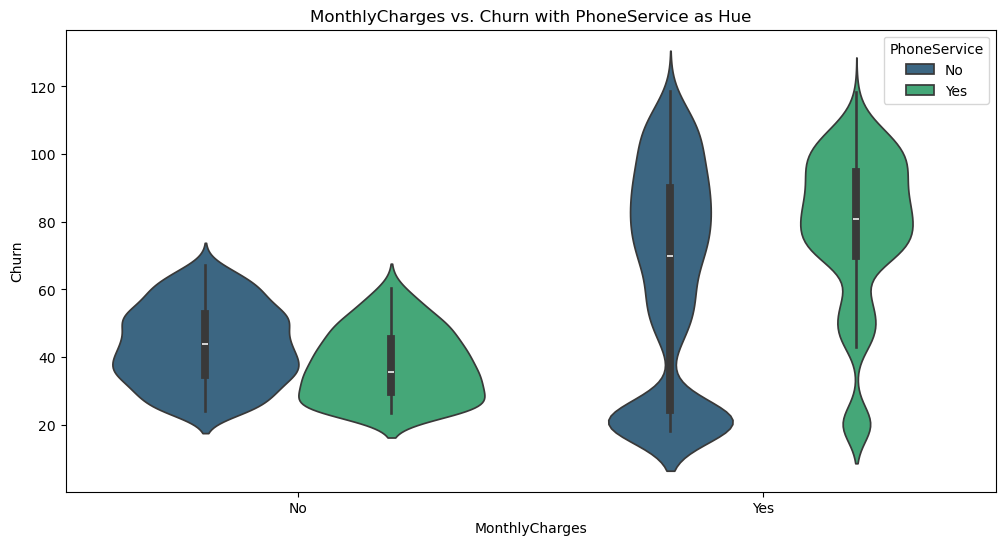

In [183]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, y='MonthlyCharges', hue='Churn', x='PhoneService', palette='viridis')
plt.title('MonthlyCharges vs. Churn with PhoneService as Hue')
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.legend(title='PhoneService')
plt.show()



* The violin plot displays the density and distribution of MonthlyCharges for each category combination of PhoneService and Churn.

#### **Observations** 

##### **PhoneService and Churn:**

*No PhoneService and No Churn :*

* The distribution of MonthlyCharges might be narrower, indicating less variation in charges for customers without phone service who did not churn.

*No PhoneService and Churn :*

* If the distribution is wider or has a different shape, it indicates variability in charges among those who churned without phone service.

*PhoneService and No Churn :*

* Typically, you might see a certain range or pattern in the distribution of charges for customers with phone service who did not churn.

*PhoneService and Churn :*

* The distribution can indicate how charges vary for customers with phone service who churned.

#### **Conclusion**

**Impact of PhoneService on Churn:**

* If there’s a significant difference in the distributions of MonthlyCharges between customers with and without phone service, it indicates that phone service could impact customer satisfaction and churn.

* For example: If customers with phone service have a wider range of monthly charges and higher churn, it might suggest dissatisfaction with the variability or high costs.

**MonthlyCharges as a Predictor of Churn:**

* Differences in the distribution of MonthlyCharges between churned and non-churned customers suggest that charges might be a strong predictor of churn.

* For example: If churned customers generally have higher monthly charges, it indicates that reducing charges or offering discounts could help retain customers.

**Phone service** alone does not show a strong relationship with churn. Both *customers with* and *without phone service* have similar churn rates.

However, we cannot  conclude that **phone service** is not a influencing factor in customer churning.

### **Tenure by Senior Citizen Status**

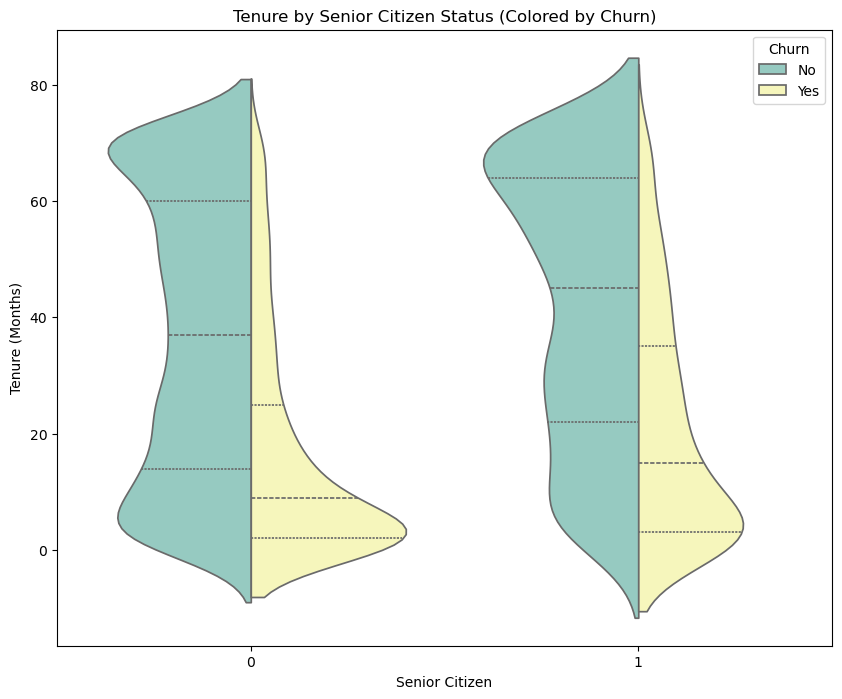

In [205]:
# Plot violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='SeniorCitizen', y='tenure', hue='Churn', data=df, split=True, palette='Set3',inner='quartile')
plt.title('Tenure by Senior Citizen Status (Colored by Churn)')
plt.xlabel('Senior Citizen')
plt.ylabel('Tenure (Months)')
plt.legend(title='Churn', loc='upper right')
plt.show()



#### **Observations**

**Tenure by Senior Citizen Status:**

* Senior citizens (SeniorCitizen = 1) tend to have slightly higher median Tenure compared to non-senior citizens (SeniorCitizen = 0).

* This may suggest that senior citizens are more likely to stay with the service provider for a longer duration.

**Impact of Churn:**

* Within each SeniorCitizen category, the distribution of Tenure varies between churned and non-churned customers.

* Higher Tenure for non-churned customers across both senior and non-senior categories may indicate a relationship between longer tenure and reduced churn rates.

#### **Conclusions**

**Higher Churn Rate Among Senior Citizens with Lower Tenure:**

* Senior citizens with lower tenure (shorter duration with the company) tend to have a higher churn rate compared to those with longer tenure.

* This suggests that newer senior citizen customers may be more likely to churn, possibly due to initial dissatisfaction, service issues, or competitive offers from other providers.

**Stability Among Long-Term Senior Citizen Customers:**

* Senior citizens with longer tenure (extended duration with the company) show more stability in terms of churn, with a lower likelihood of churning.

* Longer tenure might indicate stronger loyalty or satisfaction among senior citizens who have been with the company for a significant period, possibly due to established relationships, trust, or familiarity with services.

### **MonthlyCharges,Contract Vs Churn**

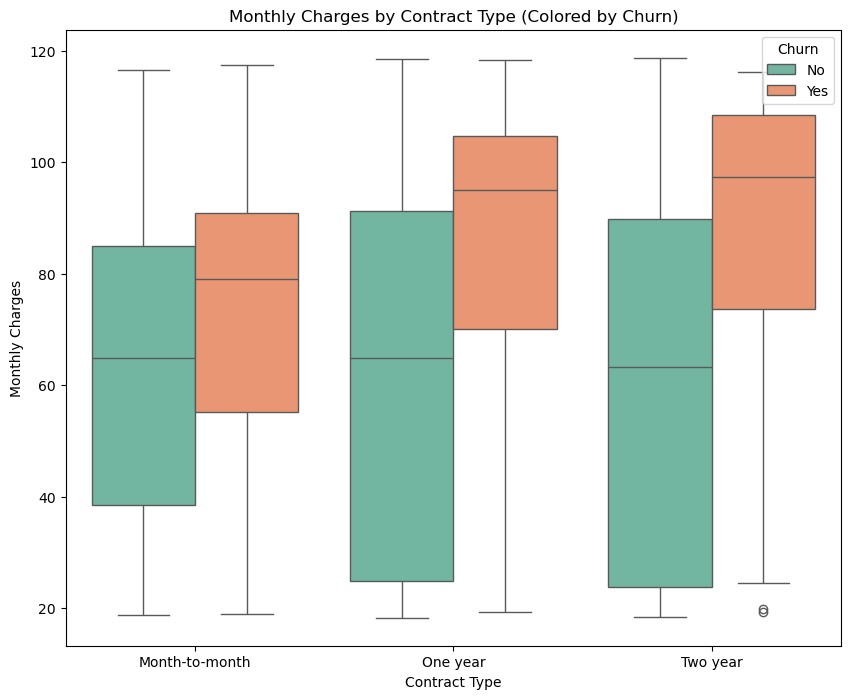

In [204]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')
plt.title('Monthly Charges by Contract Type (Colored by Churn)')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()



#### **Observation**

**Monthly Charges by Contract Type:**

* Customers with month-to-month contracts generally have higher median MonthlyCharges compared to those with one-year or two-year contracts.

* Higher monthly charges for month-to-month contracts might indicate flexibility or variability in service usage, potentially influencing churn rates.

**Impact of Churn:**

* Within each Contract type, the distribution of MonthlyCharges differs between churned (Yes) and non-churned (No) customers.

* Higher MonthlyCharges for churned customers across all contract types might suggest dissatisfaction or affordability issues, influencing churn decisions.

#### **Conclusions**

**Contract Type Influence:**

* Customers on month-to-month contracts are more susceptible to churn, potentially due to the flexibility and shorter commitment period that allows them to switch providers easily.

* Longer-term contracts (one year or two years) tend to have lower churn rates, possibly because customers perceive more value or are less inclined to switch providers frequently.

**Effect of Monthly Charges:**

* Higher Monthly Charges, especially in month-to-month contracts, may contribute significantly to churn.

* This suggests that pricing strategies should be carefully evaluated to retain customers.

* Lowering Monthly Charges or offering competitive pricing incentives could potentially reduce churn, particularly among price-sensitive customers.